# Stock price prediction - time series analysis

Basic stock price prediction project using time series analysis. I'll utilize Machine Learning techniques along with libraries such as scikit-learn, pandas, matplotlib, and tensorflow for building and training my model. 

# Code:

## - Data Collection:

I download historical closing prices for NVIDIA Corporation (NVDA) from January 1, 2015, to January 1, 2023, for training.
I download test data from January 1, 2023, to January 1, 2024.


## - Data Preparation:

Scale the training data using MinMaxScaler to normalize the values between 0 and 1.
Create sequences of 60 previous days (lookback) to predict the next day's price.
Reshape the data to be compatible with LSTM input requirements.

## - Building the Model:

Construct a Sequential model with two LSTM layers, each followed by a Dropout layer to prevent overfitting.
Add Dense layers to produce the final output.

## - Training the Model:

Compile the model with the Adam optimizer and mean squared error loss function.
Train the model for 50 epochs with a batch size of 32.

## - Prediction and Evaluation:

- Combine training and testing data for consistent scaling. <br>
- Prepare the test dataset by creating sequences similar to the training data. <br>
- Predict the stock prices using the trained model. <br>
- Inverse transform the scaled predictions to get the actual price values. <br>
- Plot the actual vs. predicted prices for visual comparison.

# 1. Data Collection

In [1]:
#Yahoo Finance API to obtain historical stock data.
#!pip install yfinance pandas scikit-learn matplotlib tensorflow

In [2]:
# Code to download historical stock data:
import yfinance as yf
import pandas as pd

# Downloading historical data for the desired stock
symbol = 'NVDA'  # Stock symbol (NVIDIA Corporation in this case)
data = yf.download(symbol, start="2015-01-01", end="2023-01-01")
data = data[['Close']]  # We use only the closing price
print(data.head())

[*********************100%%**********************]  1 of 1 completed

              Close
Date               
2015-01-02  0.50325
2015-01-05  0.49475
2015-01-06  0.47975
2015-01-07  0.47850
2015-01-08  0.49650


# 2. Data Preparation

Prepare the data for use in the Machine Learning model. Typically, the data needs to be scaled and transformed into a format that the model can understand.

In [3]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Creating a dataset with scaled prices
lookback = 60  # Use the previous 60 days to predict the next value
X, y = [], []
for i in range(lookback, len(data_scaled)):
    X.append(data_scaled[i-lookback:i, 0])
    y.append(data_scaled[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshape to 3D, required for LSTM

# 3. Building the Model
Simple LSTM (Long Short-Term Memory) model, which is a type of recurrent neural network suitable for time series data.

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X, y, batch_size=32, epochs=50)

Epoch 1/50


C:\Users\Mariana\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0156
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0017
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0019
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0015
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0015
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0012
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0012
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0011
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0014
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0011
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0010
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0010
Epoch 13/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0017
Epoch 14/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 8.2291e-04
Epoch 15/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 9.2939e-04
Epoch 1

# 4. Prediction and Evaluation
Predicting the closing prices and comparing them with the actual values.

[*********************100%%**********************]  1 of 1 completed


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


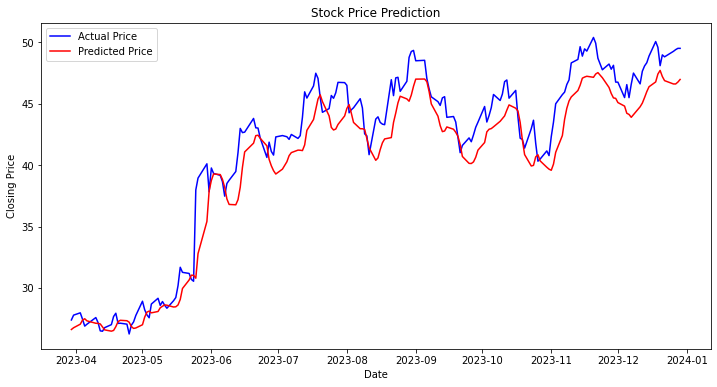

In [5]:
# Preparing the test data
test_data = yf.download(symbol, start="2023-01-01", end="2024-01-01")
test_data = test_data[['Close']]
test_data_scaled = scaler.transform(test_data)

X_test = []
y_test = test_data_scaled[lookback:, 0]

for i in range(lookback, len(test_data_scaled)):
    X_test.append(test_data_scaled[i-lookback:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Making predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Visualizing the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(test_data.index[lookback:], test_data['Close'][lookback:], color='blue', label='Actual Price')
plt.plot(test_data.index[lookback:], predicted_prices, color='red', label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# 5. Refinement and Next Steps
- Hyperparameter Tuning: Experiment with different numbers of LSTM units, dropout rates, batch sizes, and epochs to improve model performance.
- Feature Engineering: Incorporate additional features such as moving averages, trading volume, or other technical indicators to enhance the model's predictive power.
- Alternative Models: Explore other models like ARIMA, Prophet, or more advanced neural network architectures (e.g., GRU, Transformer models).
- Cross-Validation: Implement cross-validation techniques specific to time series data, such as TimeSeriesSplit from scikit-learn.
- Incorporate External Data: Include external factors such as economic indicators, news sentiment, or social media trends to provide more context to the predictions.